In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
#umeyama

def my_umeyama(campoints, worldpoints):

    camnormal=campoints-np.mean(campoints, axis=0)
    worldnormal=worldpoints-np.mean(worldpoints, axis=0)
    sig=np.zeros((3,3))
    sig2=np.zeros((3,3))

    for i in range(campoints.shape[0]):
        sig=sig+np.outer(worldnormal[i],camnormal[i])
        sig2=sig2+worldnormal[i].reshape(3,1)@camnormal[i].reshape(1,3)

    sig=sig/camnormal.shape[0]
    sig2=sig2/camnormal.shape[0]

    #print(sig)
    #print(sig2)


    det=np.linalg.det(sig)
    print('determinant',det)


    u,d,vt=np.linalg.svd(sig)

    S=np.eye(3)
    if det<0:
        S[2,2]=-1
    #print(S)
    R=u@S@vt
    #print(R)

    t=np.mean(worldpoints, axis=0)-R@np.mean(campoints, axis=0)
    #print(t)
    t=t.reshape(1,3)

    return R,t


In [3]:
bs=[]
with open(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\text files 5 variable\cam1con1.txt') as f:
    for line in f:
        a=line.strip().split(',')
        b=[int(x) for x in a]
        bs.append(b)
f.close()

num=len(bs)
with open(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\text files 5 variable\cam1con2.txt') as f:
    for line in f:
        a=line.strip().split(',')
        b=[int(x) for x in a]
        bs.append(b)
    
    #print(bs)
bs=np.array(bs)
print(bs.shape)


XYZ1=bs[:,2:5]
print("WORLD",XYZ1.shape)


xyz1=scipy.io.loadmat(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\3D kinect data\kinect_cam1_con1.mat')['name']
#print(xyz1)
print(xyz1.shape)
xyz2=scipy.io.loadmat(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\3D kinect data\kinect_cam1_con2.mat')['name']
print(xyz2.shape)

xyz=np.concatenate((xyz1,xyz2),axis=0)
print(xyz.shape)

(43, 5)
WORLD (43, 3)
(27, 3)
(16, 3)
(43, 3)


In [4]:
XYZ=np.zeros((xyz.shape[0],3))
XYZ[:,0]=XYZ1[:,0]
XYZ[:,1]=XYZ1[:,1]
XYZ[:,2]=XYZ1[:,2]
print(XYZ[0:5,:])
print(XYZ1[0:5,:])

[[2607.  810. 1950.]
 [2607. 1150. 1950.]
 [2607. 1260. 1950.]
 [2607. 1600. 1950.]
 [2297.  810. 1950.]]
[[2607  810 1950]
 [2607 1150 1950]
 [2607 1260 1950]
 [2607 1600 1950]
 [2297  810 1950]]


In [5]:
R,t=my_umeyama(xyz, XYZ)
print(R)
print(t)
p=np.vstack((R,t))
print(p.shape)
scipy.io.savemat(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\kinect parameters\new_cam1_params_umeyama.mat',mdict={'name':p})

determinant 9621494806541232.0
[[-0.58894637  0.38609321 -0.70998183]
 [ 0.06039794 -0.85501928 -0.5150671 ]
 [-0.80591207 -0.34622834  0.48024127]]
[[4498.91002576 2395.67092167  592.1036551 ]]
(4, 3)


Text(0.5, 0, 'Z Label')

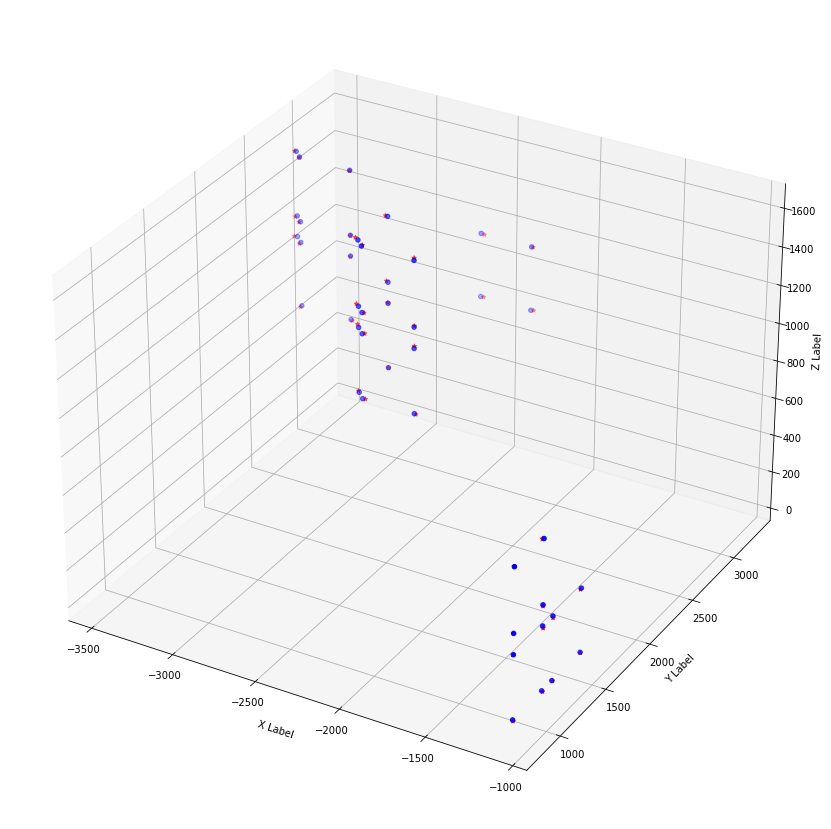

In [6]:
from turtle import color


xyz_converted=xyz@R.T+t
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
ax.scatter(-XYZ[:,0],XYZ[:,2],XYZ[:,1],marker='o',color='b')
ax.scatter(-xyz_converted[:,0],xyz_converted[:,2],xyz_converted[:,1],marker='*',color='r')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

(38, 5)
WORLD (38, 3)
(23, 3)
(15, 3)
(38, 3)
[[2297.  810. 2360.]
 [2297. 1150. 2360.]
 [2297. 1260. 2360.]
 [2297. 1600. 2360.]
 [2607.  810. 2360.]]
[[2297  810 2360]
 [2297 1150 2360]
 [2297 1260 2360]
 [2297 1600 2360]
 [2607  810 2360]]
determinant 3286913160025982.5
[[ 0.60916861 -0.33600935  0.71833928]
 [ 0.11627283 -0.85817293 -0.50001985]
 [ 0.78447067  0.38811974 -0.48370326]]
[[1020.88012756 2423.54901943 5015.15304116]]
(4, 3)


Text(0.5, 0, 'Z Label')

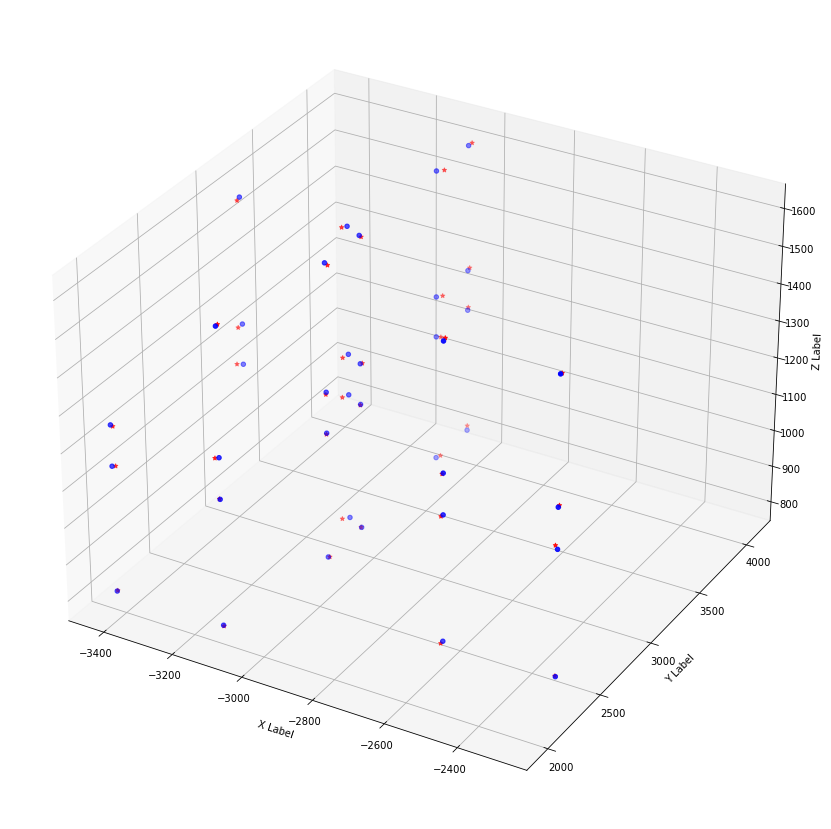

In [7]:
bs=[]
with open(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\text files 5 variable\cam2con1.txt') as f:
    for line in f:
        a=line.strip().split(',')
        b=[int(x) for x in a]
        bs.append(b)
f.close()

num=len(bs)
with open(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\text files 5 variable\cam2con2.txt') as f:
    for line in f:
        a=line.strip().split(',')
        b=[int(x) for x in a]
        bs.append(b)
    
    #print(bs)
bs=np.array(bs)
print(bs.shape)


XYZ1=bs[:,2:5]
print("WORLD",XYZ1.shape)


xyz1=scipy.io.loadmat(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\3D kinect data\kinect_cam2_con1.mat')['name']
#print(xyz1)
print(xyz1.shape)
xyz2=scipy.io.loadmat(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\3D kinect data\kinect_cam2_con2.mat')['name']
print(xyz2.shape)

xyz=np.concatenate((xyz1,xyz2),axis=0)
print(xyz.shape)

XYZ=np.zeros((xyz.shape[0],3))
XYZ[:,0]=XYZ1[:,0]
XYZ[:,1]=XYZ1[:,1]
XYZ[:,2]=XYZ1[:,2]
print(XYZ[0:5,:])
print(XYZ1[0:5,:])

R,t=my_umeyama(xyz, XYZ)
print(R)
print(t)
p=np.vstack((R,t))
print(p.shape)
scipy.io.savemat(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\kinect parameters\new_cam2_params_umeyama.mat',mdict={'name':p})


xyz_converted=xyz@R.T+t
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
ax.scatter(-XYZ[:,0],XYZ[:,2],XYZ[:,1],marker='o',color='b')
ax.scatter(-xyz_converted[:,0],xyz_converted[:,2],xyz_converted[:,1],marker='*',color='r')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

(50, 5)
WORLD (50, 3)
(26, 3)
(24, 3)
(50, 3)
[[3083. 1150. 4752.]
 [3083. 1260. 4752.]
 [3083. 1600. 4752.]
 [3083. 1650. 4802.]
 [3083. 1650. 5112.]]
[[3083 1150 4752]
 [3083 1260 4752]
 [3083 1600 4752]
 [3083 1650 4802]
 [3083 1650 5112]]
determinant 1.2945116373293672e+16
[[-0.7537832   0.31187336 -0.57839942]
 [ 0.13365277 -0.78903839 -0.59962934]
 [-0.64338777 -0.52929521  0.55308115]]
[[4569.14947099 2408.41301088 4020.96418083]]
(4, 3)


Text(0.5, 0, 'Z Label')

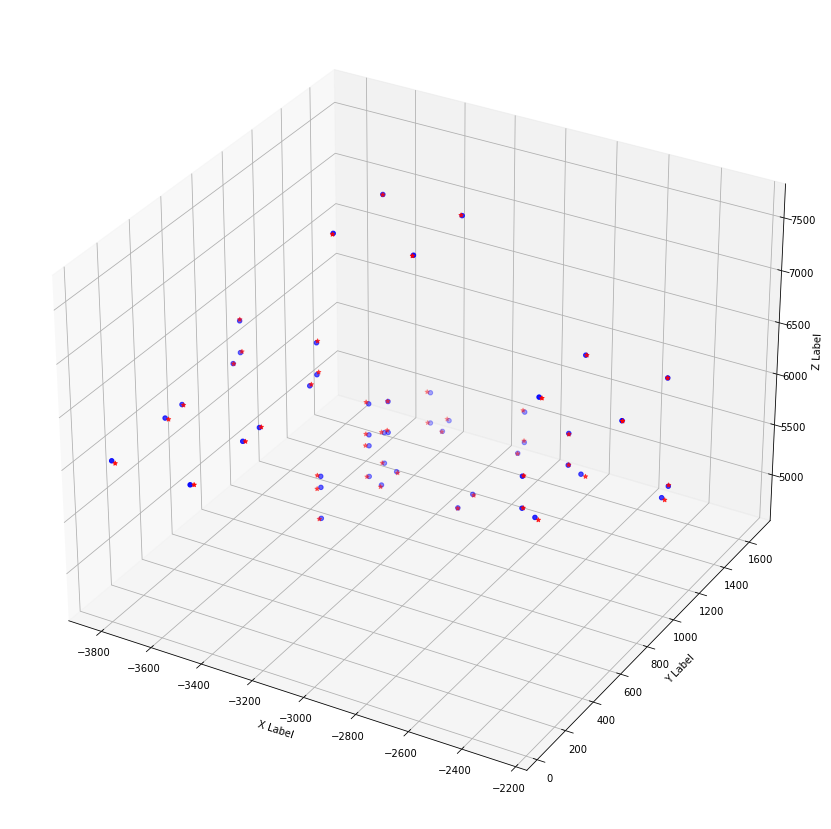

In [15]:
bs=[]
with open(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\text files 5 variable\cam3con1.txt') as f:
    for line in f:
        a=line.strip().split(',')
        b=[int(x) for x in a]
        bs.append(b)
f.close()

num=len(bs)
with open(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\text files 5 variable\cam3con2.txt') as f:
    for line in f:
        a=line.strip().split(',')
        b=[int(x) for x in a]
        bs.append(b)
    
    #print(bs)
bs=np.array(bs)
print(bs.shape)


XYZ1=bs[:,2:5]
print("WORLD",XYZ1.shape)


xyz1=scipy.io.loadmat(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\3D kinect data\kinect_cam3_con1.mat')['name']
#print(xyz1)
print(xyz1.shape)
xyz2=scipy.io.loadmat(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\3D kinect data\kinect_cam3_con2.mat')['name']
print(xyz2.shape)

xyz=np.concatenate((xyz1,xyz2),axis=0)
print(xyz.shape)

XYZ=np.zeros((xyz.shape[0],3))
XYZ[:,0]=XYZ1[:,0]
XYZ[:,1]=XYZ1[:,1]
XYZ[:,2]=XYZ1[:,2]
print(XYZ[0:5,:])
print(XYZ1[0:5,:])

R,t=my_umeyama(xyz, XYZ)
print(R)
print(t)
p=np.vstack((R,t))
print(p.shape)
scipy.io.savemat(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\kinect parameters\new_cam3_params_umeyama.mat',mdict={'name':p})


xyz_converted=xyz@R.T+t
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
ax.scatter(-XYZ[:,0],XYZ[:,1],XYZ[:,2],marker='o',color='b')
ax.scatter(-xyz_converted[:,0],xyz_converted[:,1],xyz_converted[:,2],marker='*',color='r')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

(22, 5)
WORLD (22, 3)
(17, 3)
(5, 3)
(22, 3)
[[3071. 1150. 8012.]
 [3381. 1150. 8012.]
 [3071.  810. 8012.]
 [3381.  810. 8012.]
 [2369. 1200. 8510.]]
[[3071 1150 8012]
 [3381 1150 8012]
 [3071  810 8012]
 [3381  810 8012]
 [2369 1200 8510]]
determinant 1127169429088665.2
[[ 0.87297188  0.48321514  0.06650726]
 [ 0.28454151 -0.39374741 -0.87407042]
 [-0.396177    0.78196298 -0.48122519]]
[[2744.83132472 2545.84402267 9970.83777199]]
(4, 3)


Text(0.5, 0, 'Z Label')

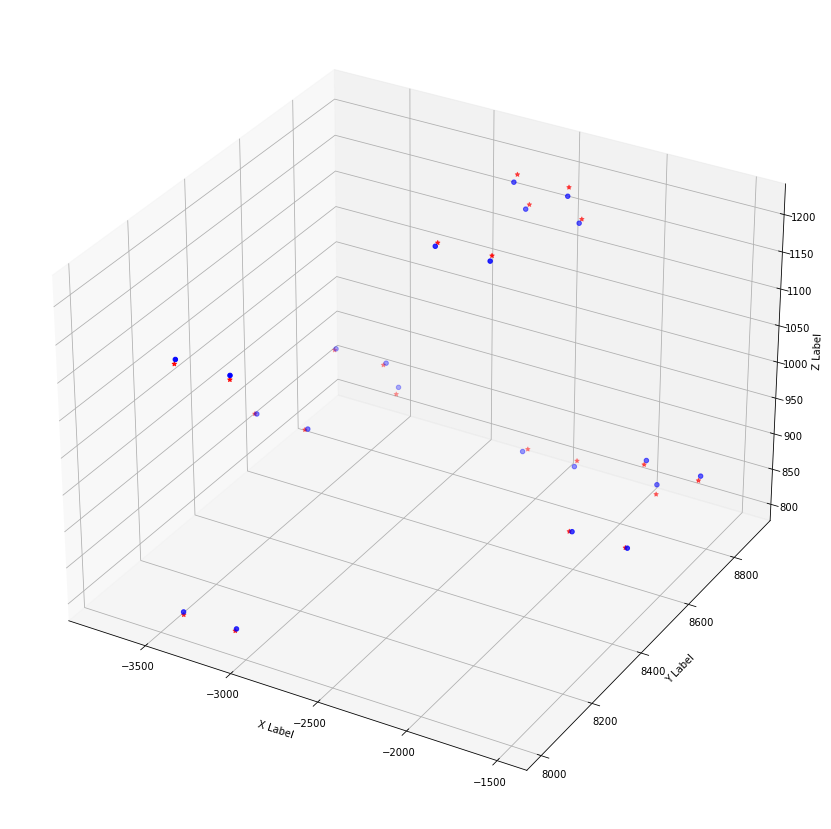

In [17]:
bs=[]
with open(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\text files 5 variable\cam4con1.txt') as f:
    for line in f:
        a=line.strip().split(',')
        b=[int(x) for x in a]
        bs.append(b)
f.close()

num=len(bs)
with open(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\text files 5 variable\cam4con2.txt') as f:
    for line in f:
        a=line.strip().split(',')
        b=[int(x) for x in a]
        bs.append(b)
    
    #print(bs)
bs=np.array(bs)
print(bs.shape)


XYZ1=bs[:,2:5]
print("WORLD",XYZ1.shape)


xyz1=scipy.io.loadmat(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\3D kinect data\kinect_cam4_con1.mat')['name']
#print(xyz1)
print(xyz1.shape)
xyz2=scipy.io.loadmat(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\3D kinect data\kinect_cam4_con2.mat')['name']
print(xyz2.shape)

xyz=np.concatenate((xyz1,xyz2),axis=0)
print(xyz.shape)

XYZ=np.zeros((xyz.shape[0],3))
XYZ[:,0]=XYZ1[:,0]
XYZ[:,1]=XYZ1[:,1]
XYZ[:,2]=XYZ1[:,2]
print(XYZ[0:5,:])
print(XYZ1[0:5,:])

R,t=my_umeyama(xyz, XYZ)
print(R)
print(t)
p=np.vstack((R,t))
print(p.shape)
scipy.io.savemat(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo kinect calibration\New Calibration\image,txt,mat\kinect parameters\new_cam4_params_umeyama.mat',mdict={'name':p})


xyz_converted=xyz@R.T+t
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
ax.scatter(-XYZ[:,0],XYZ[:,2],XYZ[:,1],marker='o',color='b')
ax.scatter(-xyz_converted[:,0],xyz_converted[:,2],xyz_converted[:,1],marker='*',color='r')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')